<a href="https://colab.research.google.com/github/Ferarenas14/Ferarenas14/blob/main/Polinomio_Lagrange_con_Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Polinomio Lagrange con Sympy

Polinomio de interpolación de Lagrange:
x**2


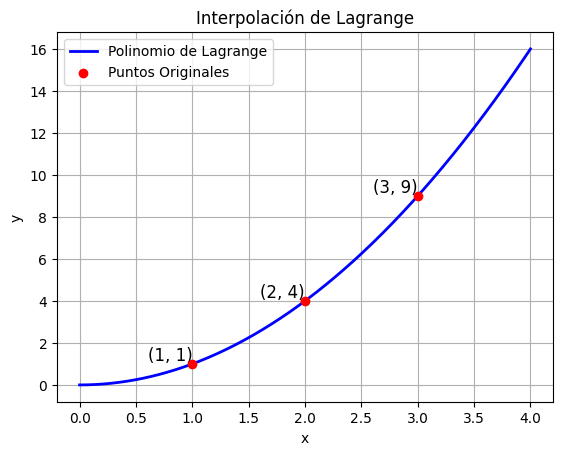

In [2]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

# Función para calcular el polinomio de interpolación de Lagrange
def polinomio_lagrange(x_datos, y_datos):
    x = sp.symbols('x')

    # Inicializar el polinomio de Lagrange
    polinomio = 0


    for i in range(len(x_datos)):
        # Producto de (x - x_j) / (x_i - x_j) para cada i distinto de j
        L = 1
        for j in range(len(x_datos)):
            if i != j:
                L *= (x - x_datos[j]) / (x_datos[i] - x_datos[j])
        # Añadir el término correspondiente al polinomio
        polinomio += y_datos[i] * L

    return sp.simplify(polinomio)

# Función para graficar el polinomio de Lagrange y los puntos originales
def graficar(x_datos, y_datos, polinomio):

    # Crear un rango de valores de x para la gráfica del polinomio
    x_vals = np.linspace(min(x_datos) - 1, max(x_datos) + 1, 400)
    # Evaluar el polinomio de Lagrange para los valores de x
    y_vals = np.array([float(polinomio.evalf(subs={sp.symbols('x'): val})) for val in x_vals])

    # Graficar el polinomio de Lagrange
    plt.plot(x_vals, y_vals, label="Polinomio de Lagrange", color="blue", linewidth=2)

    # Graficar los puntos originales
    plt.scatter(x_datos, y_datos, color="red", zorder=5, label="Puntos Originales")

    # Etiquetas de los puntos
    for i in range(len(x_datos)):
        plt.text(x_datos[i], y_datos[i], f"({x_datos[i]}, {y_datos[i]})", fontsize=12, verticalalignment='bottom', horizontalalignment='right')

    #  ráfica
    plt.title("Interpolación de Lagrange")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.legend()
    plt.show()

# Ejemplo
# Ingresar los puntos de la tabla de datos
x_datos = [1, 2, 3]  #  valores de x
y_datos = [1, 4, 9]  #  valores de y

# Calcular el polinomio de interpolación de Lagrange
polinomio = polinomio_lagrange(x_datos, y_datos)

# Mostrar el polinomio
print("Polinomio de interpolación de Lagrange:")
print(polinomio)

# Graficar el polinomio junto con los puntos originales
graficar(x_datos, y_datos, polinomio)